**Importing Libraries**

In [10]:

import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout,MaxPooling2D

In [11]:
# Set image dimensions
img_rows, img_cols = 102, 136
data_path = 'C:/Users/Sai/Downloads/Face_Mask_Detection22/dataset'

# Initialize lists for images (x) and labels (y)
x, y = [], []
counter = 0

# Get the class labels
classes = os.listdir(data_path)
print(classes)

['without_mask', 'with_mask']


In [12]:
# Iterate through 'with_mask' and 'without_mask' directories
for class_path in os.listdir(data_path):
    class_folder_path = os.path.join(data_path, class_path)

    # Ensure it's a directory
    if os.path.isdir(class_folder_path):
        for img_path in os.listdir(class_folder_path):
            img_full_path = os.path.join(class_folder_path, img_path)

            # Load image and resize
            image = load_img(img_full_path, target_size=(img_rows, img_cols))

            # Convert image to array
            image = img_to_array(image)

            # Append image to 'x' and label (counter) to 'y'
            x.append(image)
            y.append(counter)

    # Increment label counter for the next class
    counter += 1

# Convert lists to numpy arrays for model processing
x = np.array(x)
y = np.array(y)

In [13]:
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

y_train = keras.utils.to_categorical(y_train, num_classes=2)
y_val = keras.utils.to_categorical(y_val, num_classes=2)
y_test = keras.utils.to_categorical(y_test, num_classes=2)

X_train.shape

(6042, 102, 136, 3)

In [14]:
model = Sequential()
model.add(Conv2D(6, (5,5), activation='relu', input_shape=(img_rows, img_cols, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(16, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 132, 6)        456       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 49, 66, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 45, 62, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 22, 31, 16)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 10912)             0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Accuracy'])
history = model.fit(X_train, y_train, batch_size=120, validation_data = (X_val, y_val), epochs=10)

Epoch 1/10
51/51 [==============================] - 20s 277ms/step - loss: 15.0080 - Accuracy: 0.6038 - val_loss: 0.6274 - val_Accuracy: 0.6702
Epoch 2/10
51/51 [==============================] - 9s 183ms/step - loss: 0.4828 - Accuracy: 0.7825 - val_loss: 0.3875 - val_Accuracy: 0.8477
Epoch 3/10
51/51 [==============================] - 9s 179ms/step - loss: 0.2024 - Accuracy: 0.9215 - val_loss: 0.3286 - val_Accuracy: 0.8728
Epoch 4/10
51/51 [==============================] - 9s 175ms/step - loss: 0.0966 - Accuracy: 0.9654 - val_loss: 0.3048 - val_Accuracy: 0.8967
Epoch 5/10
51/51 [==============================] - 9s 176ms/step - loss: 0.0412 - Accuracy: 0.9887 - val_loss: 0.3794 - val_Accuracy: 0.8834
Epoch 6/10
51/51 [==============================] - 9s 174ms/step - loss: 0.0220 - Accuracy: 0.9952 - val_loss: 0.3861 - val_Accuracy: 0.8755
Epoch 7/10
51/51 [==============================] - 9s 175ms/step - loss: 0.0156 - Accuracy: 0.9969 - val_loss: 0.4119 - val_Accuracy: 0.8768
Epoc

In [16]:
score = model.evaluate(X_test, y_test)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")

24/24 [==============================] - 1s 24ms/step - loss: 0.3835 - Accuracy: 0.9034
Test loss: 0.38349735736846924
Test accuracy: 0.9034391641616821


24/24 [==============================] - 1s 22ms/step


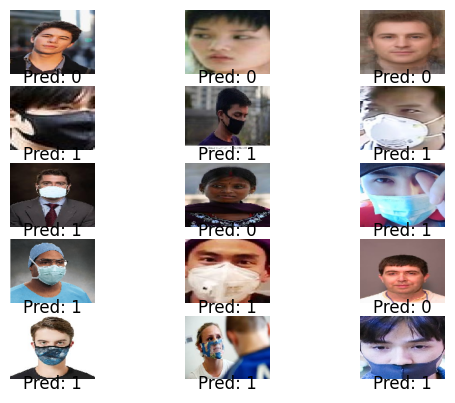

In [17]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
for i in range(15):
    plt.subplot(5, 3, i + 1)
    plt.imshow(X_test[i].astype("uint8"), cmap='gray')  # Display the test image
    plt.axis('off')
    plt.text(0.5, -0.15, f"Pred: {predicted_labels[i]}", fontsize=12, ha='center', transform=plt.gca().transAxes)

plt.show()

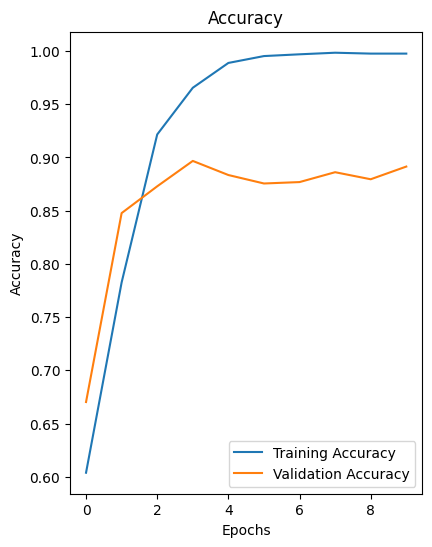

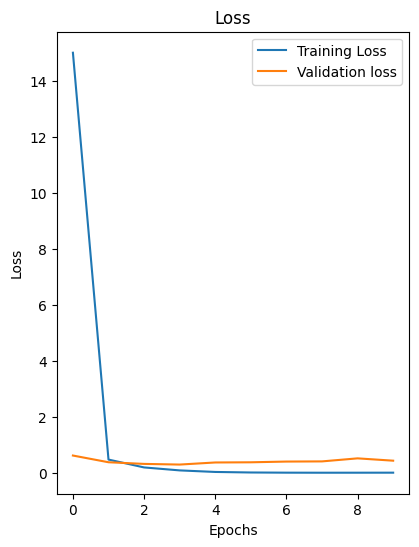

In [18]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['Accuracy'], label= 'Training Accuracy')
plt.plot(history.history['val_Accuracy'], label= 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label= 'Training Loss')
plt.plot(history.history['val_loss'], label= 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [19]:
model.save('face_mask_detection_model2.h5')

C:\Users\Sai\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
# Check available keys
print(history.history.keys())

# Access metrics based on available keys
train_accuracy = history.history.get('accuracy', history.history.get('acc', []))
val_accuracy = history.history.get('val_accuracy', history.history.get('val_acc', []))
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Print out the metrics
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Training Loss:", train_loss)
print("Validation Loss:", val_loss)


dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy'])
Training Accuracy: []
Validation Accuracy: []
Training Loss: [15.008024215698242, 0.4828031659126282, 0.2023649960756302, 0.09655600041151047, 0.04116655886173248, 0.022016823291778564, 0.01557078491896391, 0.01361844688653946, 0.01432179193943739, 0.01536619570106268]
Validation Loss: [0.6273600459098816, 0.3875339925289154, 0.3285694122314453, 0.30481794476509094, 0.3794197142124176, 0.38605427742004395, 0.4119124412536621, 0.4179506003856659, 0.5264293551445007, 0.4433230459690094]
